# Dataset Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import unicodedata
import miniut
from miniut import console
import wordcloud

In [2]:
console.init()
versions = [['pandas:', pd.__version__],
            ['numpy:', np.__version__],
            ['matplotlib:', matplotlib.__version__],
            ['seaborn:', sns.__version__],
            ['nltk:', nltk.__version__],
            ['miniut:', miniut.__version__],
            ['wordcloud:', wordcloud.__version__]
            ]
console.print_matrix(versions, style='semibox', header=['Library', 'Version'], indexes=None)

      Library      Version   
   --------------------------
 |    pandas:       1.4.2    
 |    numpy:       1.22.4    
 |  matplotlib:     3.5.2    
 |   seaborn:      0.11.2    
 |     nltk:         3.7     
 |    miniut:       0.1.0    
 |  wordcloud:      1.8.1    



In [3]:
data = pd.read_csv('data/spanish_tweets_suggesting_signs_of_depression_v1.csv')
data

,TWEET_ID_ANON,USER_ID_ANON,TWEET_TEXT,CREATED_AT
0,1,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017
1,2,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017
2,3,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017
3,4,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017
4,5,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017
...,...,...,...,...
995,996,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018
996,997,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018
997,998,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017
998,999,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018


In [4]:
data[data.duplicated()]

,TWEET_ID_ANON,USER_ID_ANON,TWEET_TEXT,CREATED_AT


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TWEET_ID_ANON  1000 non-null   int64 
 1   USER_ID_ANON   1000 non-null   int64 
 2   TWEET_TEXT     1000 non-null   object
 3   CREATED_AT     1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [6]:
data.drop('TWEET_ID_ANON', axis=1, inplace=True)
data

,USER_ID_ANON,TWEET_TEXT,CREATED_AT
0,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017
1,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017
2,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017
3,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017
4,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017
...,...,...,...
995,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018
996,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018
997,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017
998,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018


In [7]:
data['TWEET_TEXT_NORMALIZED'] = data['TWEET_TEXT'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
data

,USER_ID_ANON,TWEET_TEXT,CREATED_AT,TWEET_TEXT_NORMALIZED
0,1,Deberían eliminar a las malas personas y a los...,Sat Oct 28 16:07:06 +0000 2017,deberian eliminar a las malas personas y a los...
1,1,Ya deja de intentar contarle tus problemas a a...,Thu Nov 02 06:25:04 +0000 2017,ya deja de intentar contarle tus problemas a a...
2,1,La tristeza es lo más fácil de ocultar de todo...,Thu Dec 14 02:06:52 +0000 2017,la tristeza es lo mas facil de ocultar de todo...
3,1,De las peores cosas de la depresión es que no ...,Sun Jul 16 19:30:11 +0000 2017,de las peores cosas de la depresion es que no ...
4,1,La soledad es lo único constante en mi vida. C...,Mon Oct 23 02:52:07 +0000 2017,la soledad es lo unico constante en mi vida. c...
...,...,...,...,...
995,90,De nuevo vacío,Tue Feb 20 10:48:26 +0000 2018,de nuevo vacio
996,90,SOY GAY SOY GAY SOY GAY SOY GAY SOY PUTAMENTE ...,Mon Mar 26 19:00:08 +0000 2018,soy gay soy gay soy gay soy gay soy putamente ...
997,90,Cansado si muy cansado de todo de la gente y d...,Tue Nov 14 21:14:43 +0000 2017,cansado si muy cansado de todo de la gente y d...
998,90,LA VIDA ME MATAA,Fri Mar 09 19:15:59 +0000 2018,la vida me mataa


In [8]:
letters: str = 'abcdefghijklmnopqrstuvwxyz '
exclude_words: list[str] = ['externallink', '  ', '\n']

dictionary: dict[str, str] = {'irmeeeeeeeee' : 'irme',
                              'depresionladepresionesmulticolor' : 'depresion la depresion es multicolor',
                              'sentidotengo' : 'sentido tengo',
                              'vivirya' : 'vivir ya',
                              'llorellore ' : 'llore llore',
                              'tengoestabilidad' : 'tengo estabilidad',
                              'depresivacomplicadacelosagritonaexhaustivainsistenteproblematicai' : 'depresiva complicada los agritona exhaustiva insistente problematica',
                              'asiinseguramolesta' : 'asi insegura molesta',
                              'salidahabia' : 'salida habia',
                              'xq' : 'porque',
                              'cambiarrr' : 'cambiar',
                              'masmentalmente' : 'mas mentalmente',
                              'agotadaespiritualmente' : 'agotada espiritualmente',
                              'moriiiirrrrr' : 'morir',
                              'morirrrrrrr' : 'morir',
                              'mataa' : 'matar',
                              'estallartodo' : 'estallar todo',
                              }

def remove_exclude_words(string: str) -> str:
    for word in exclude_words:
        string = string.replace(word, '')
    return string

def replace_dictionary(string: str) -> str:
    for key, value in dictionary.items():
        string = string.replace(key, value)
    return string

def del_bad_characters(string: str) -> str:
    s = string.replace('\n', ' ')
    s = ''.join([c for c in s if c in letters])
    return remove_exclude_words(s)

text = ' '.join([replace_dictionary(del_bad_characters(s)) for s in data['TWEET_TEXT_NORMALIZED']])

console.println(text[:1000], endl='...')

deberian eliminar a las malas personas y a los que odiamos vivirel mundo seria mejor sin nosotros ya deja de intentar contarle tus problemas a alguien entiende a nadie le importas la tristeza es lo mas facil de ocultar de todos los sentimientos que trae consigo la depresion la depresion es multicolor de las peores cosas de la depresion es que no te deja ganas de vivir ni de matarte solo te tiene aqui agonizando la soledad es lo unico constante en mi vida creo que nunca conocere el amor la amistad la felicidad lo que es vivir ya me canse quiero desaparecer pero al mismo tiempo quisiera que alguien se diera cuenta el infierno en el que vivo no madre no estoy enferma de flojera no no tengo narcolepsiame esta consumiendo la depresion mi vida no tiene sentido tengo las mismas ganas de irme de este mundo como aquel que esta en una fiesta donde  ya me canse de ser gorda ya me canse de ser un fracaso ya me canse de serya quiero irme segun mis calculos yo ya deberia estar muerta odio sentirme t

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
sw = nltk.corpus.stopwords.words('spanish')
swn = [unicodedata.normalize('NFKD', s).encode('ascii', errors='ignore').decode('utf-8') for s in sw]
console.println(swn)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'mas', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'si', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'tambien', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mi', 'antes', 'algunos', 'que', 'unos', 'yo', 'otro', 'otras', 'otra', 'el', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tu', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mio', 'mia', 'mios', 'mias', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estas', 'esta', 'estamos', 'estais', 'estan', 'e

In [11]:
wc = wordcloud.WordCloud(collocations=False,
                         background_color='white',
                         stopwords=swn,
                         max_font_size=256,
                         random_state=42,
                         width=500,
                         height=500
                         ).generate(text)

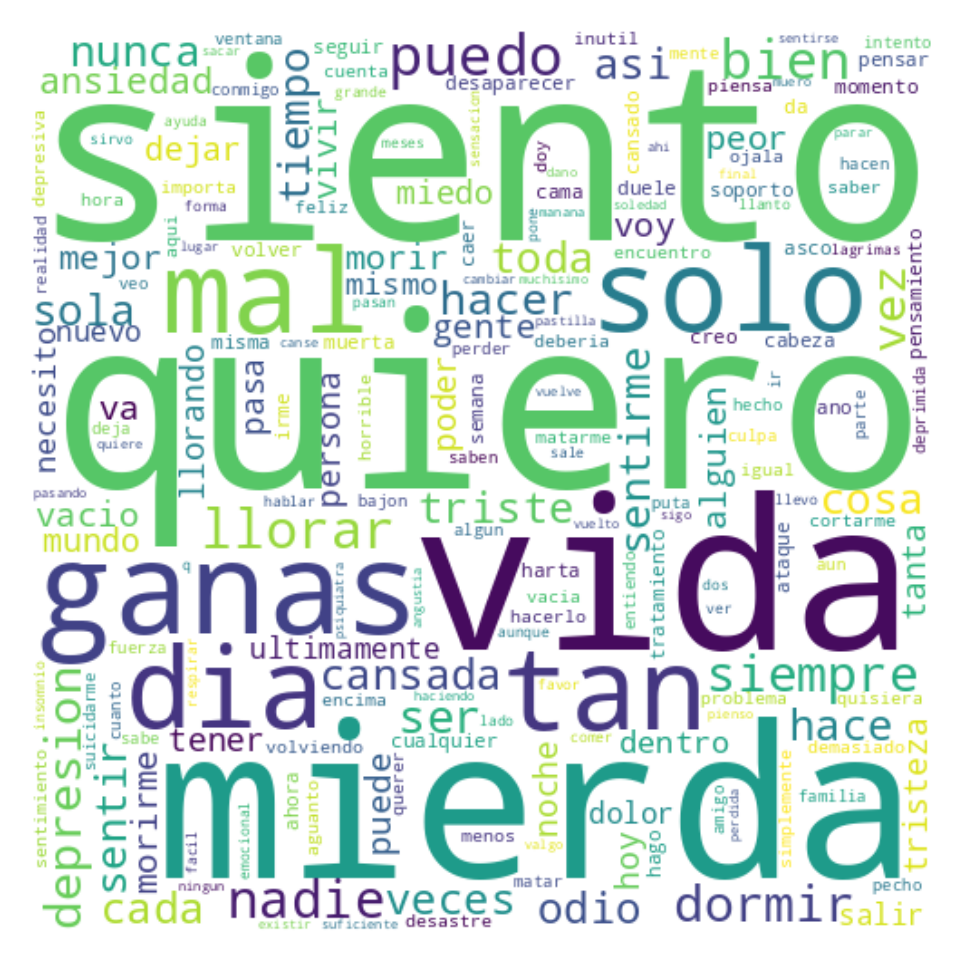

In [12]:
fig = plt.figure(dpi=300)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

fig.savefig('img/wordcloud.jpg',
            bbox_inches='tight',    
            dpi=300
            )

plt.close()


In [13]:
bow = pd.Series(text.split(' ')).value_counts()
bow_clean = {k: v for k, v in bow.items() if k not in swn}
del bow_clean['']

In [14]:
for i, (k, v) in enumerate(bow_clean.items()):
    if i < 20:
        console.println(f'{i+1:>2} | {k:10} : {v:>4}')
    else:
        break

 1 | siento     :  115
 2 | quiero     :  109
 3 | vida       :   80
 4 | mierda     :   80
 5 | ganas      :   75
 6 | solo       :   74
 7 | mal        :   74
 8 | tan        :   72
 9 | puedo      :   63
10 | bien       :   55
11 | llorar     :   55
12 | nadie      :   51
13 | siempre    :   47
14 | dormir     :   46
15 | dia        :   45
16 | depresion  :   44
17 | vez        :   44
18 | ser        :   42
19 | hacer      :   39
20 | odio       :   36


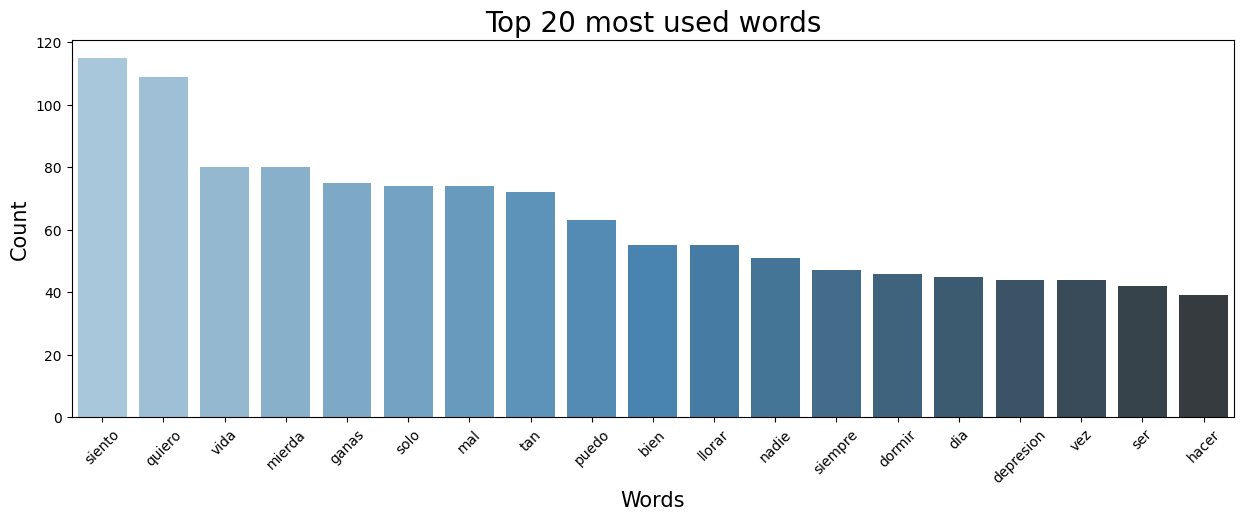

In [15]:
fig = plt.figure(figsize=(15, 5), dpi=100)

plt.xticks(rotation=45)
plt.xlabel('Words', fontsize=15)
plt.ylabel('Count', fontsize=15)

n = 19
x, y = list(bow_clean.keys())[:19],\
       list(bow_clean.values())[:19]

fig = sns.barplot(x=x,
                  y=y,
                  palette='Blues_d',
                  ).set_title(f'Top {n+1} most used words',
                              fontsize=20
                              )

plt.show()

fig.get_figure().savefig('img/top_20_words.jpg',
                         bbox_inches='tight',
                         dpi=200
                         )

plt.close()